In [1]:
from SA.SA import run_SA
from ACA.ACA import run_ACA
from ALR.ALR import run_ALR

import numpy as np
import matplotlib.pyplot as plt


## Generate Data

In [2]:
dataset_size = 1
tsp_size = 20
points_coordinates = np.random.uniform(size=(dataset_size, tsp_size, 2))

## Run Solutions

In [3]:
SA_distance, SA_nodes, SA_time, SA_best_historical_dist = run_SA(points_coordinates, iterations=300, t_max=50, t_min=1)  # Simulated annealing
ACA_distance, ACA_nodes, ACA_time = run_ACA(points_coordinates, iterations=300, population=5, alpha=1, beta=2, rho=0.1) # Ant Colony Optimisation
ALR_distance, ALR_nodes, ALR_time = run_ALR(points_coordinates, temperature=1.0) # Attention Learn to Route


  [*] Loading model from ALR/pretrained/tsp_100/epoch-99.pt


In [4]:
print(f"---- SIMULATED ANNEALING ----")
print(f"Total Distance: {SA_distance}")
print(f"Nodes to Follow: {SA_nodes}")
print(f"Total Time: {SA_time}")
print("\n\n")
print(f"---- ANT COLONY OPTIMISATION ----")
print(f"Total Distance: {ACA_distance}")
print(f"Nodes to Follow: {ACA_nodes}")
print(f"Total Time: {ACA_time}")
print("\n\n")
print(f"---- GRAPH NEURAL NET ----")
print(f"Total Distance: {ALR_distance}")
print(f"Nodes to Follow: {ALR_nodes}")
print(f"Total Time: {ALR_time}")

---- SIMULATED ANNEALING ----
Total Distance: 42.635761186496296
Nodes to Follow: [58 12 62 11 53 51  2  0 38 25  8 24 80 47 48 56 69 86 72 23 20 36 60 67
 14 59  1 71 42 16 13 18 99 92 29 97 34 37 49 78 96 79 84 89 70 57 63 15
 83 87 35 85 19 45 30  3 77 41 75 95 98 66 28 27 68 88 21 40 31 76 32 46
  7  9 82 22 33 39 93 94 91 90 43 61  6 73 52 10 54 26  4 44 64 81 50 74
 65 17 55  5]
Total Time: 7.929297924041748



---- ANT COLONY OPTIMISATION ----
Total Distance: 8.77826987414784
Nodes to Follow: [ 0 96 88 57 10 36 29 82 47 21 68 34 80 39 30 62  4 27 85 94 95 28 75 50
 12 32 44 81 46 64 74 83 33 24 41 18  9 37  7 51 26 14 76 25  5 86 97 61
 31  8  6 73 16 52 59 43 23 78 72 13 67 63 55 38 48 15  3 99 20 87 40 17
 60 92 45 56 65 89 53 98 11 54 58  1 93 69 19 77 66 22 71 35 79 42 90 49
 84  2 91 70]
Total Time: 8.135650396347046



---- GRAPH NEURAL NET ----
Total Distance: 7.924330462787994
Nodes to Follow: [93, 1, 58, 95, 94, 28, 32, 12, 50, 75, 44, 81, 46, 54, 74, 64, 83, 11, 98, 41

## Plot Stuff

### SA Graphs


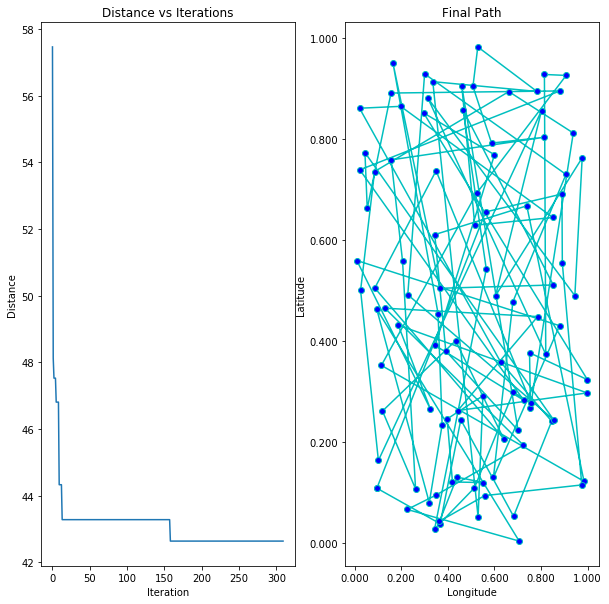

In [5]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2, figsize=(10,10))

best_points_ = np.concatenate([SA_nodes, [SA_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]
ax[0].plot(SA_best_historical_dist)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[0].title.set_text("Distance vs Iterations")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].title.set_text('Final Path')

plt.show()

### ACA Graphs

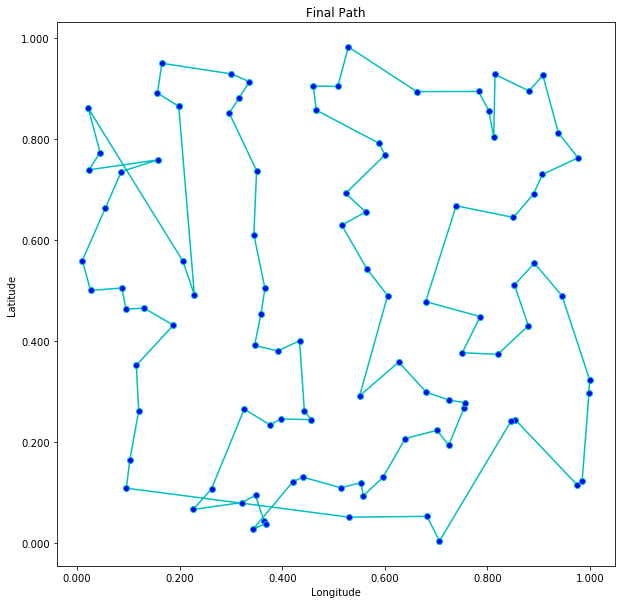

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

best_points_ = np.concatenate([ACA_nodes, [ACA_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]

ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.title.set_text('Final Path')

plt.show()

### ALR Graphs

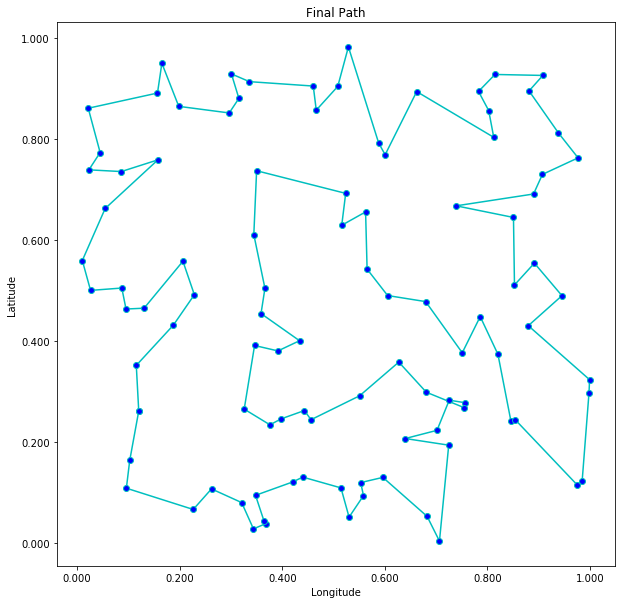

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

best_points_ = np.concatenate([ALR_nodes, [ALR_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]

ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.title.set_text('Final Path')

plt.show()

In [8]:
# np.save("data_that_makes_nn_look_really_good.npy", points_coordinates)